In [1]:
import numpy as np
import matplotlib.pyplot as plt



import numpy as np
from numpy.lib.arraysetops import isin
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV


In [2]:
from scipy.integrate import solve_ivp
from ssmlearnpy.utils import ridge
from ssmlearnpy.reduced_dynamics.shift_or_differentiate import shift_or_differentiate
from ssmlearnpy.reduced_dynamics.normalform import NormalForm, NonlinearCoordinateTransform
from sklearn.preprocessing import PolynomialFeatures

from ssmlearnpy.reduced_dynamics.normalform import NonlinearCoordinateTransform, NormalForm, create_normalform_transform_objective, prepare_normalform_transform_optimization, unpack_optimized_coeffs
from scipy.optimize import minimize
import numpy as np
from scipy.io import savemat

# Fitting the inverse transformation

In [3]:
x = np.linspace(-1, 2, 20)
y = np.linspace(-1, 2, 20)
X, Y = np.meshgrid(x, y)

In [4]:
XX = np.vstack((X.ravel(), Y.ravel())).T

In [5]:
polyfeat = PolynomialFeatures(degree = 3, include_bias=False)

In [6]:
XXX = polyfeat.fit_transform(XX)

In [7]:
XXX.shape

(400, 9)

In [8]:
np.random.seed(0)

Generate a radom set of real coefficients

In [9]:
transformCoeffs = np.random.rand(2, 9)

In [10]:
transformCoeffs[:2, :2] = np.eye(2)

In [11]:
XXX.shape

(400, 9)

In [12]:
TF = NonlinearCoordinateTransform(2, 3, inverse_transform_coefficients=transformCoeffs)


In [13]:
one = transformCoeffs@XXX.T

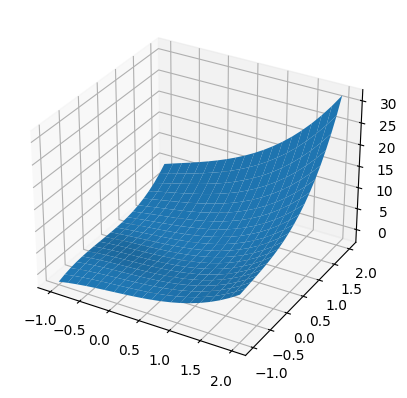

In [14]:
f = plt.figure()
ax = f.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, one[0,:].reshape(X.shape))

In [15]:
np.allclose(TF.inverse_transform(XX.T), one)

True

In [16]:
_, inverse = ridge.fit_inverse(TF.inverse_transform, [XX.T], 10, near_identity=True)
#transformed = TF.inverse_transform(trajs)
#inversetransformed = [inverse(t.T) for t in transformed]

INFO   2023-04-18 23:11:51 ridge Transforming data
INFO   2023-04-18 23:11:51 ridge Skipping CV on ridge regression
INFO   2023-04-18 23:11:51 ridge Fitting regression model


In [17]:
transformed = TF.inverse_transform([XX.T])


Text(0, 0.5, 'Predicted value')

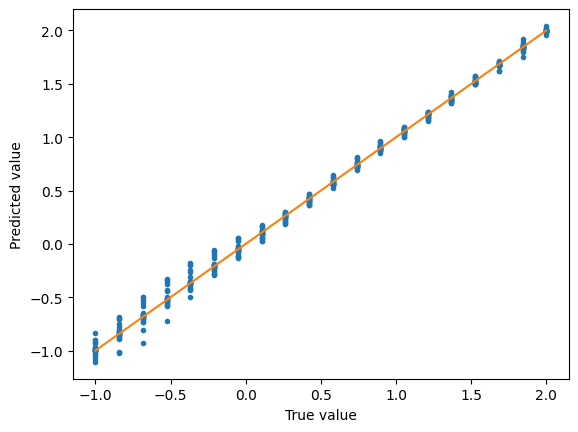

In [18]:
inversetransformed = [inverse(t.T) for t in transformed]
plt.plot(XX.T[0,:], inversetransformed[0][:,0], '.')
plt.plot(XX.T[0,:], XX.T[0,:], '-')
plt.xlabel('True value')
plt.ylabel('Predicted value')



In [19]:
np.max(np.abs(XX.T[0,:] - inversetransformed[0][:,0].T))

0.24092174054377735

## Complex coefficients: 

In [20]:
np.random.seed(1)
x = np.random.rand(1, 400) + 1j * np.random.rand(1,400)
transformCoeffs = np.random.rand(1, 9) + 1j*np.random.rand(1,9)

In [21]:
from ssmlearnpy.utils.preprocessing import insert_complex_conjugate

In [22]:
xx = insert_complex_conjugate(x)

In [23]:
TF = NonlinearCoordinateTransform(2, 3, inverse_transform_coefficients=transformCoeffs, linear_transform=np.eye(2))


In [24]:
trajectory = [xx]

In [25]:
_, inverse = ridge.fit_inverse(TF.inverse_transform, trajectory, 5, near_identity=True)
#transformed = TF.inverse_transform(trajs)
#inversetransformed = [inverse(t.T) for t in transformed]

In [26]:
image = TF.inverse_transform(trajectory)

In [27]:
TF.set_transform_coefficients(_)

In [28]:
inversetransformed = [inverse(t) for t in image]


Text(0, 0.5, 'Predicted value')

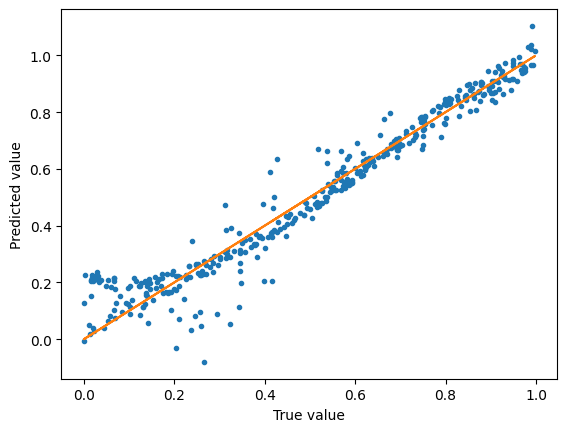

In [29]:
plt.plot(np.real(xx[0,:]), np.real(inversetransformed[0]), '.')
plt.plot(np.real(xx[0,:]), np.real(xx[0,:]), '-')

plt.xlabel('True value')
plt.ylabel('Predicted value')



Text(0, 0.5, 'Predicted value')

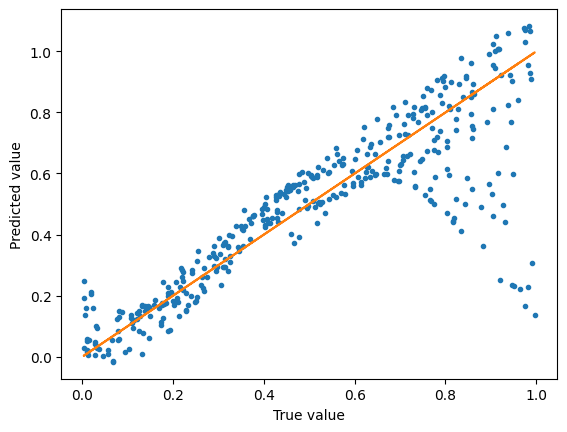

In [30]:
plt.plot(np.imag(xx[0,:]), np.imag(inversetransformed[0]), '.')
plt.plot(np.imag(xx[0,:]), np.imag(xx[0,:]), '-')

plt.xlabel('True value')
plt.ylabel('Predicted value')


In [31]:
_, inverse = ridge.fit_inverse(TF.inverse_transform, trajectory, 3, near_identity=True)

In [32]:
image = TF.inverse_transform(trajectory)

In [36]:
TF.set_transform_coefficients(_)

In [37]:
inversetransformed = [TF.transform(t) for t in image]


Text(0, 0.5, 'Predicted value')

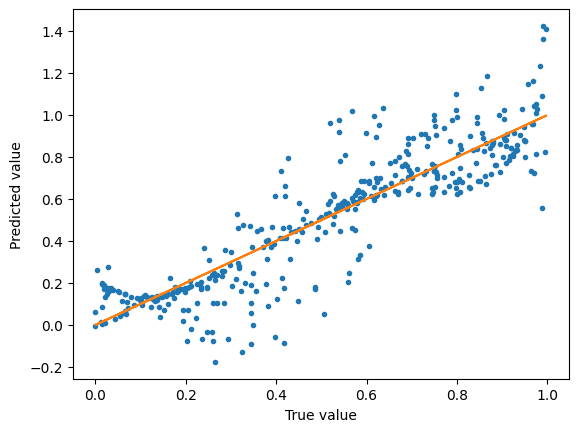

In [38]:
plt.plot(np.real(xx[0,:]), np.real(inversetransformed[0][0,:]), '.')
plt.plot(np.real(xx[0,:]), np.real(xx[0,:]), '-')

plt.xlabel('True value')
plt.ylabel('Predicted value')

